In [68]:
import pandas as pd

df = pd.read_csv("transactions.csv")
df["Date"] = df["Date"].str.slice(2)
n_tran = []
for i, group in df.groupby("Date"):
    n_tran.append(len(group))
n_tran = np.array(n_tran)

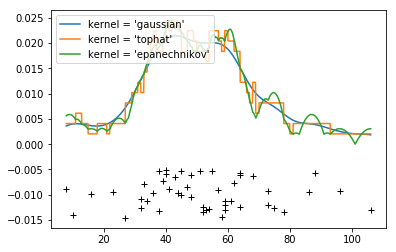

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

#N = 100
#np.random.seed(1)
X = n_tran
X = X.reshape(len(X),1)

X_plot = np.linspace(np.min(X), np.max(X), 1000)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
#             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

#true_dens =
fig, ax = plt.subplots()
#ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
#        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

#ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

#ax.set_xlim(-4, 9)
#ax.set_ylim(-0.02, 0.4)
plt.show()

In [13]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")


[0 1 0 2 3 3 1 3 1 0 1 2 2 2 0 3 2 0 1 0 1 1 1 0 1 1 0 1 0 3 0 1 1 0 0 0 0
 3 1 0 0 1 1 3 0 2 1 0 2 0 3 3 2 0 1 2 2 1 1 3 0 1 0 0 0 0 0 0 0 1 2 0 0 3
 2 0 2 2 0 1 1 0 3 2 2 1 3 3 0 1 0 2 0 3 1 0 0 0 0 3 0 2 1 0 1 2 1 2 1 0 0
 0 1 1 3 2 1 1 1 2 1 1 3 0 1 0 1 1 2 0 0 0 1 2 0 0 0 0 0 0 3 2 3 3 3 1 3 0
 1 0 0 1 1 3 1 0 1 1 1 1 0 0 3 3 3 0 0 0 0 1 0 0 0 1 0 3 1 2 0 0 0 1 0 1 3
 2 0 2 3 0 2 3 2 0 0 1 3 0 0 0 2 1 0 0 1 0 0 3 3 2 2 1 1 0 1 0 0 1 2 3 3 2
 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 2 1 3 0 1 0 3 3 1 2 2 0 2 3 1 1
 0 2 1 1 3 0 2 2 1 0 0 0 0 2 0 2 0 2 3 0 2 3 3 2 2 1 2 2 1 0 0 0 3 0 0 1 1
 0 0 0 1 1 0 0 3 2 1 1 0 1 1 2 0 0 3 1 0 0 0 1 2 3 2 2 1 1 3 1 0 0 3 3 3 1
 0 3 1 0 0 0 2 1 0 0 0 1 1 3 0 0 0 1 0 0 2 1 1 0 3 1 2 0 2 3 1 0 0 0 2 0 1
 0 2 1 3 0 0 3 1 1 0 0 2 0 0 2 0 0 0 0 0 1 1 2 1 3 1 1 1 0 2 3 0 0 1 1 2 3
 3 0 1 0 0 1 3 2 0 0 3 2 3 3 1 3 1 0 2 0 0 1 0 0 0 1 0 0 0 0 2 1 0 0 1 0 1
 0 2 0 0 2 0 2 0 2 0 0 0 1 3 1 0 1 1 2 2 1 0 3 0 1 2 3 0 3 0 1 2 2 0 1 1 1
 0 0 1 1 1 3 2 3 3 2 3 1 

In [32]:
"""
Estimate the probability of a person belonging to a particular cluster.
Estimates the maximum likelihood parameters for the biases. This is the
probability that a person from a particular cluster will answer true to a particular question.
"""
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))



def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.
    # Likelihood of belonging to each cluster
    people = np.empty((n_people, n_clusters))
    for j in range(n_people):
        for i in range(n_clusters):
            temp = np.array([1 if x == True else -1 for x in answers[j,:]])
            prob = temp*(biases[:,i].ravel()) % 1
            people[j,i] = np.prod(prob)

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.

    # This is probably not the correct answer!
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)

(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
[[ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]]
[[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 ..., 
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]]


In [19]:
answers

array([[False, False, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True, False,  True],
       [False, False,  True, ...,  True,  True, False],
       ..., 
       [False, False,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False]], dtype=bool)

In [23]:
temp = answers.copy().astype(np.int_)
temp[temp==0] = -1
np.dot(temp, biases)

array([[ 3.97186497,  1.61545005,  3.08016803, -3.23781062],
       [-0.70091403,  3.05922665,  3.12042129, -0.77619139],
       [ 6.2241164 ,  1.73526905,  1.70825291, -1.08538291],
       ..., 
       [ 1.91730924, -0.05469645, -0.5948001 ,  0.85450568],
       [-0.47994643,  3.17450978,  0.23686663, -1.9930672 ],
       [-2.47195191, -0.82197493, -1.98865345, -1.43523111]])

In [24]:
biases

array([[  1.02292890e-01,   8.93396544e-01,   9.05998949e-01,
          9.24279001e-01],
       [  1.12140057e-02,   7.59766239e-01,   4.88456066e-01,
          4.79515853e-01],
       [  4.15114022e-01,   5.00062744e-01,   6.98683186e-02,
          5.34179266e-01],
       [  6.15327772e-01,   4.63758595e-01,   3.22818164e-02,
          5.65719682e-01],
       [  7.18506867e-01,   6.58974467e-02,   7.48240053e-01,
          9.02057971e-01],
       [  4.55865539e-01,   6.92832139e-02,   7.26133164e-04,
          6.08334534e-02],
       [  7.28173293e-01,   8.20387141e-01,   2.98853361e-01,
          1.61982861e-01],
       [  7.32457763e-01,   6.32445111e-01,   9.62462471e-02,
          8.69555785e-01],
       [  1.84706346e-01,   4.96577345e-01,   6.91745785e-02,
          7.26091217e-01],
       [  5.21575471e-01,   6.14948650e-01,   8.15694564e-01,
          8.48682288e-02],
       [  2.68167921e-01,   2.30881864e-01,   1.13360748e-01,
          9.54407407e-01],
       [  4.51477187e

In [25]:
np.product([])

AxisError: axis 3 is out of bounds for array of dimension 0